<a href="https://colab.research.google.com/github/voleka-ocrv/AvitoAnalyticsAcademy/blob/main/ch1_statistical_criterion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [1.1. Статистический критерий](https://www.youtube.com/watch?v=iCmrr0EDrG0&t=1347s)

Задача:

Есть компания, которая продает и доставляет людям товары.
Курьер получает 500 руб. за каждую доставку.
Если примерка проша успешно, клиент платит 1000 руб. за доставку и забирает товар (1000 - 500 = +500 руб.). Если нет - клиент ничего не выкупает и не платит (0 - 500 = -500 руб.)

Согласно бизнес-модели, если клинеты будут выкупать заказ в 50% случаев, то компания выходит в ноль, если больше, то уже в прибыль.

100 заказов
50 выкупили = 50 доставок * 1000 руб. = 50 000 руб.
50 не выкупили = 50 доставок

| 100 доставок  |  Расходы | Доходы  | Выручка  |
|---|---|---|---|
|50 доставок выкуплено  |50 * 500 = 25 000|50 * 1000 = 50 000 |50 000 - 25 000 = 25 000|
|50 доставок не выкуплено   |50 * 500 = 25 000   |50 * 0 = 0   |0 - 25 000 = -25 000   |
|   |   |   |25 000 - 25 000 = 0   |

## Гипотеза
Хотим проверить гипотезу о том, что клиенты выкупают больше 50% заказов.
Допустим, мы нашли 30 клиентов, 19 из которых выкупили заказ.

11 * (-500) + 19 * 500 = -5500 + 9 500 = 4 000

## Вводим статистическую модель

Возьмем 30 пользователей и предположим
Предположим, что каждый пользователь семплирован из распределения Бернулли.

$$
ξ ~ Bernulli(μ)

ξ1, ξ2, ..., ξ30
$$

## Статистический критерий
### Шаг 1
H0: mu = 50% (статус кво)
H1: mu > 50% (изменения есть)

### Шаг 2
Случайная величина Q = xi1 + xi2 + ... + xi30 ~ Binom(n, mu) ~ Binom(30, 0.5) (для верной H0)

Сумма n бернуллевских величин подчиняется Биномиальному распределению.
### Шаг 3
Установим произвольный порог равный 21
```
if Q >= 21:
  reject H0
else
  not reject H0
  ```
### Шаг 4 Задаем критическую область (определить стат.значимость)
alpha = стат.значимость 5%
FPR (false positive rate) <= alpha

Выбираем такой порог, чтобы, если полученное в ходе экспериманта знаение болше или равно значению критической области, отвергнуть H0.

В нашем случае это 20.
```
if Q >= 20:
  reject H0
else
  not reject H0
```
### Определение
Статистический критерий уровня стат.значимости alpa
Строгог математическое правило, которое выдает вердикт отвергать гипотезу или не отвергать причем вероятность ложноположительного критерия (FPR) ограничено сверху alpha.



# [1.2. Создаем статистические критерии в Python](https://www.youtube.com/watch?v=3Hu8xthLj0Q)

## Часть 3. Статистические функции в Python

В этой части посмотрим, как вывести то, что мы получили в части 2, с помощью Python. А также поймём, как найти подходящее $C$ с помощно Python.

### Биномиальное распределение

Мы выяснили, что статистика $Q$ имеет биномиальное распределение.

Биномиальное распределение $Віном(n, μ)$ - распределение количества успехов в последовательно из $n$ независимых случайных экспериментов, вероятность успеха в каждом из которых равна $μ$.

Чтобы работать с распределением, можно создать объект-распределение с помощью библиотеки scipy.stats.

In [ ]:
from scipy.stats import binom
import numpy
from matplotlib import pyplot

In [ ]:
binom_h0 = binom(
n = 30, # количество испытаний
p = 0.5 # вероятность успеха
)

In [ ]:
binom_h0.rvs (1)

array([18])


Функция вероятности

Функция вероятности дискретного распределения $p_ξ(x)$ - вероятность с которой $ξ$ принимает значение $x$.

В Python это функция рmf (probability mass function).

In [ ]:
binom_h0.pmf(21)

0.013324571773409854

Изобразим распределение статистики $Q$ при справедливости H0 на графике. Для этого можно передать сразу массив точек, для которых надо рассчитать вероятность.

In [ ]:
pyplot.style.use('dark_background')

In [ ]:
# координата
x_grid = numpy.arange(1, 31)
# высота столбцов на графике
probs = binom_h0.pmf(x_grid)

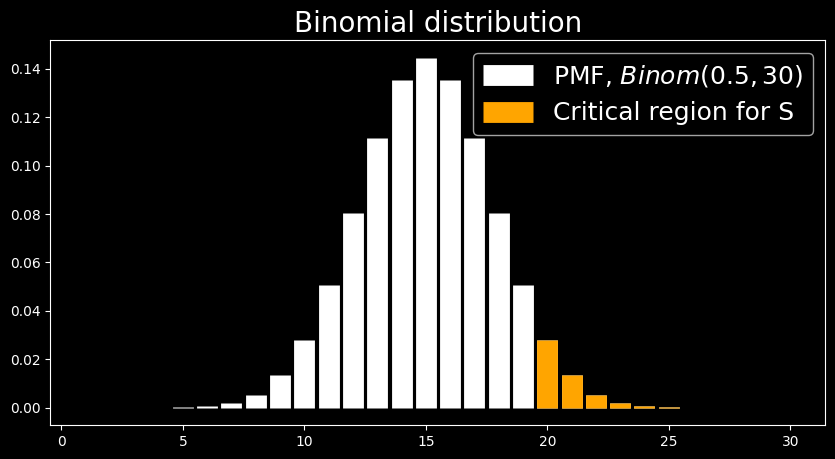

In [ ]:
pyplot.figure(figsize=(10, 5))
# 2 строим вертикальные столбцы от в до вероятности
pyplot.vlines(x_grid, 0, probs, linewidth=15.0, color='white', label='PMF, $Binom (0.5, 30)$')
# отдельно изобразим критическую области критерия
crit_reg = x_grid >= 20
pyplot.vlines(x_grid[crit_reg], 0, probs[crit_reg], linewidth=15.0, color='orange', label='Critical region for S')
pyplot.title('Binomial distribution', fontsize=20)
pyplot.legend(fontsize=18)
pyplot.show()

На самом деле мы уже сейчас можем посчитать, какая вероятность попадания в критическую область. Нужно просто посуммировать высоту оранжевых столбцов.
Получаем площадь закрашенной области, что равно вероятности попасть в эту критическую область. Она равна 5%

In [ ]:
numpy.sum(probs[crit_reg])

0.049368573352694636

Получаем то число, которое было в части 2. Значит мы действительно построили критерий уровня $α=0.05$. Более того, это критерий уровня $0.0494$ (т.е. вероятность ошибиться всего 4,9%), но такую точность обычно не используют.


А что если бы взяли $C=19$?

Вернемся к первоначальному примеру, в котором мы получили 19 успехов из 30 доставок.

Тогда вероятность ошибки была бы равна 10%.

In [ ]:
crit_reg = x_grid >= 19
numpy.sum(probs[crit_reg])

0.10024421103298672

## Куммулятивная функция распределения
Куммулятивная функция распределения - вероятность того, что величина примет значение X или меньше.

Допустим мы хотим найти такое количество столбиков справа, такое, что суммарное количество = 5%

Это равносильно задаче найти квантиль 95%

Найди суммарную площадь столбцов


## Квантиль
Чтобы выбрать критическую область для критерия, мы хотели бы найти точку, площадь столбцов справа от которой была бы 5%. То есть площадь столбцов слева 95%. Такая точка называется кантилью.

Но при р = 0.95 и нашем биномнальном распределения, такой точех нет. Мы выяснили, что есть точка, справа от которой площадь 0.494, а у следующий уже 0.1.

Чтобы определить квантиль в этом случае, модифицируем определение:

Квантиль $Quantile_p(ξ)=u_p(ξ) = min\{x|F_ξ(x) ≥ p\}$
Вуличина, которую $ξ$ не превышает с вероятностью хотя бы $p$.

**Пример**

Для величины - $Binom(30, 0.5)$ посчитаем 0.95-квантиль. Решим задачу просто подбором.

$P(ξ≤18) ≈ 0.90 $

$P(ξ≤19) ≈ 0.951 $

$P(ξ≤20) ≈ 0.97 $

Видим, что 18 нам ещё не подходит, а 19 и большие значение уже подойдут. В них функция респределения будет больше $p$. Ответ - наименьшее подходящее значение, т.е. 19. При этом нет точки, где функция распределения была бы равна $p$ в точности.

Если бы распределение было непрерывное, можно было бы сказать, что квантиль - такое $x$ на котором функция распределения равна $p$. Но в прошлом пункте мы увидели, что для дис дискретного распределения такого может не быть.

В Python квантиль можно посчитать через функцно ppf. (percent point function)

In [ ]:
binom_h0.ppf(0.95)

19.0

Если площать до 19 столбика (строго до, не включая 19), это 95%, то площадь столбиков 20+ это 5%

In [ ]:
binom_h0.cdf(19)

0.9506314266473055

In [ ]:
1 - binom_h0.cdf(19)

0.04936857335269451

Как теперь подобрать $C$ для любых $n$, $μ$ и для любого уровня значимости $α$?

1. Требуется найти $C$, такое что $P(Q ≥ C) ≤ α$
2. То есть требуется $P(Q < C) ≥ 1 - α $
3. $Q$ принимает только целые значения: $P(Q ≤ C - 1) ≥ 1 - α$ , или $F(c - 1) ≥ 1 - α$
4. Значит, из определения квантили, $C - 1 =u_{1-α}$
5. Значит $C=u_{1-α}+1$

In [ ]:
def make_binom_criterion(n, mu=0.5, alpha = 0.05 ) :
  """Строит критерий для задачи с доставкой

    Параметры:
      n: количество доставок в эксперименте
      mu: вероятность успеха в нулевой гипотезе
      alpha: уровень значимости критерия

    Возвращает:
      С для критерия S = {0 >= C}
  """
  binom_h0 = binom(n=n, p=mu)
  q = binom_h0.ppf(1-alpha)
  return q + 1

In [ ]:
print(f'if 0 >= ', make_binom_criterion(n=30, mu=0.5, alpha=0.05), 'then reject H0')

if 0 >=  20.0 then reject H0


$Q=19$, значит H0 (клиенты выкупают в 50% случаев - бизнес не выгоден) мы не отвергаем.

При этом нам удалось построить процесс, по которому мы принимаем решение для любого уровня значимости и значения статистики критерия.

# [1.3. Cтатистический критерий уровня статзначимости α](https://www.youtube.com/watch?v=2tnhLq9eYZU&t=2s)


```
if p-value <= alpha:
  reject H0
else:
  not reject H0
```



In [ ]:
def pvalue_binom(n, mu, q):

  """Считает рѵalue для задачи с доставкой

  Параметры:
    n: количество доставок в эксперименте
    q: количество успешных доставок

  Возвращает:
    pvalue для критерия S = {|0 - 15| >= C}
  """
  binom_h0 = binom(n=n, p=mu)
  return 1 - binom_h0.cdf(q - 1)

In [ ]:
print(f'if {pvalue_binom(n=30, mu=0.5, q = 20):0.4} <= alpha, then reject HO')

if 0.04937 <= alpha, then reject HO


Таким образом у нас нет оснований отклонить H0.

# [1.4. Двусторонние критерии](https://www.youtube.com/watch?v=Od929fnVxPo&t=29s)
До этого момента нас интересовали лонение от верактности в 50% только в одну сторону. И логично, ведь это продиктоване бизнес-смыслен. Только большая доля успешных деставах приведёт к успеху. И обычно при приметы решений так и бывает. При тестировании нового решения на продукта рассматриве одностороня гипотеза, потому что в противном случае нет смысле внедрить решение на всех пользователей.

Однако иногда может потребоваться доказывать отклонения в обе стороны, если вы провериете каное-то предположение. Пусть вам дали монетку и просят проверить, честная она или нет. Мечетка частное, если при подбрасываниях вероятность выпадения прие равна 0.5. Вы подбрасываете монетку 30 раз, каждый бросок Бернулиевск величина, аналогична задача с доставками. И нулевая гипотезата не самок a = 0.5 На теперь мы хотим отвергать эту гипотезу как в случае большой вероятности орла, так и решки.

In [ ]:
binom_h0_nonsym = binom(
n = 30, # количество испытаний
p = 0.8 # вероятность успеха
)

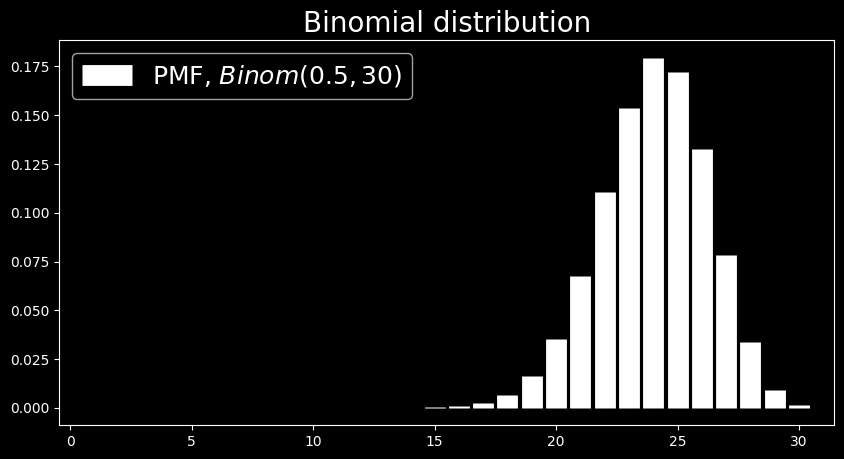

In [ ]:
pyplot.figure(figsize=(10, 5))

# считаем вероятности значений суммы
probs = binom_h0_nonsym.pmf(x_grid) #probability mass funcion

# строим вертикальные столбцы от и до вероятности

pyplot.vlines(x_grid, 0, probs, linewidth=15.0, color='white', label='PMF, $Binom (0.8, 30)$')
pyplot.title('Binomial distribution', fontsize=20)
pyplot.legend(fontsize=18, loc='upper left')
pyplot.show()

In [ ]:
def two_sided_criterion_nonsym(n, mu, alpha):
  """Строит двусторонний критерий для несимметричной задачи с доставкой

  Параметры:

  n: количество доставок в эксперименте

  mu: вероятность успеха в нулевой гипотезе

  alpha: уровень значимости критерия

  Возвращает:

  С1, С2 для критерия S = {Q <= C1 или Q >= C2}
  """
  binom_h0 = binom(n=n, p=mu)

  # аналогично одностороннему критерию
  c2 = binom_h0.ppf(1 - alpha/2) + 1

  # по выкладкам выше
  c1 = binom_h0.ppf(alpha/2) - 1

  return c1, c2

In [ ]:
c1, c2 = two_sided_criterion_nonsym(30, 0.8, 0.05)
c1, c2

(18.0, 29.0)

In [ ]:
1 - pvalue_binom(30, 0.8, c1)

0.003111048631983415

In [ ]:
pvalue_binom(30, 0.8, c2)

0.010522490333925716

Значит наш критерий для проверки гипотезы

$H_0: μ = 0.08$

$H_1: μ ≠ 0.08$

имеет вид

$S = \{Q(ξ) ≤ 18\} U \{Q(ξ) ≥ 29\} $
